# Catalyst preprocessing script
## This script is for preprocessing the catalyst UAV photos for solar panel detection. Current stage is listed below
1. Append the height of the photo to the name of the photos
2. Take out the starting 3 second and ending 1 second of the video, those are proven to contain acceleration and stopping time that should not be added in our data

### Stage 1: Append altitude to end of photo

In [3]:
from PIL import Image
from PIL.ExifTags import TAGS
import os
from libxmp import XMPFiles, consts
import numpy as np

In [5]:
# Directory to change
#directory = '/scratch/sr365/Catalyst_data/2021_05_11_10_C_90'
directory = '/scratch/sr365/Catalyst_data/0112_Moreen/photos'
# placeholder for list of files to be renamed and their new name 
# (since photo is opened during this, it can't be renamed instantly)
old_name_list = []
new_name_list = []

height_list = []
# Loop over the folder
for file in os.listdir(directory):
    if not file.endswith('.JPG') and not file.endswith('.jpg'):
        continue
    imagename = os.path.join(directory, file)
    print('current image is {}'.format(imagename))
    
    #######################
    # The XMP data method #
    #######################
    xmpfile = XMPFiles(file_path=imagename)
    xmp = xmpfile.get_xmp()
    #print(xmp.get_property(consts.XMP_NS_DC,'drone-dji'))
    
    #print(xmp)
    #print(type(xmp))
    xmp_str = xmp.serialize_to_str()
    #print(xmp_str)
    split = xmp_str.split('drone-dji:RelativeAltitude')
    height = int(split[1].split('.')[0][2:])     # Take the middle part and strip the extra symbols 
    print('height = {}'.format(height))
    new_name = os.path.join(directory, file.split('.')[0]+f'_height_{round(height)}m.JPG')
    old_name_list.append(imagename)
    new_name_list.append(new_name)
    #image.close()
       
    """
    #############################################################################################################################
    # The exif data method, this is desolete as XMP method is more reliable (but the package is much more difficult to install) #
    #############################################################################################################################
    exifdata = image.getexif()
    shutter_speed, iso = 0, 0
    for tag_id in exifdata:
        #print(tag_id)
        # get the tag name, instead of human unreadable tag id
        tag = TAGS.get(tag_id, tag_id)
        #print(tag)
        if tag == 'ExposureTime':
            shutter_speed = exifdata.get(tag_id)
            print('Shutter speed = {}'.format(shutter_speed))
        if tag == 'ISOSpeedRatings':
            iso = exifdata.get(tag_id)
            print('ISO = {}'.format(iso))
        #if tag == 'GPSInfo':
        #    data = exifdata.get(tag_id)
        #    # decode bytes 
        #    if isinstance(data, bytes):
        #        data = data.decode()
        #    if isinstance(data[6], tuple):
        #        height = data[6][0]/ data[6][1]
        #    else:
        #        height = data[6]
        if shutter_speed != 0 and iso != 0:
            #print(f"height = {round(height)}")
            #height_list.append(height)
            # ISO and shutter speed
            new_name = os.path.join(directory, file.split('.')[0]+f'_iso_{iso}_shutter_{1/shutter_speed}.JPG')
            #new_name = os.path.join(directory, file.split('.')[0]+f'_height_{round(height)}m.JPG')
            old_name_list.append(imagename)
            new_name_list.append(new_name)
            image.close()
            break;
    """
#np.savetxt('RIT_sample_imagery_height.txt', np.array(height_list))\

# Rename here
print("new_name_list = ", new_name_list)
print("old_name_list = ", old_name_list)
for (older_name, new_name) in zip(old_name_list, new_name_list):
    os.rename(older_name, new_name)



current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0026.JPG
height = 30
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0009.JPG
height = 19
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0027.JPG
height = 20
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0025.JPG
height = 40
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0002.JPG
height = 1
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0016.JPG
height = 100
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0017.JPG
height = 110
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0010.JPG
height = 38
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0023.JPG
height = 110
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0003.JPG
height = 2
current image is /scratch/sr365/Catalyst_data/0112_Moreen/photos/DJI_0013.JPG
height = 70
current i

## Modify the height information (If altitude measurement is incorrect)

In [3]:
import os
# The data directory to look for all the data
data_dir = '2021_03_10_10_D_90/'
# The altitude adjustment to apply, positive means plus and negative means minus from recording
height_adjustment = 30

for file in os.listdir(data_dir):
    if 'height_' not in file:
        continue
    print(file)
    height = file.split('height_')[-1].split('m')[0]
    print("original height:", height)
    new_height = int(height) + height_adjustment
    new_name = file.replace(height, str(new_height))
    os.rename(os.path.join(data_dir, file), os.path.join(data_dir, new_name))

DJI_0001_height_20m.JPG
original height: 20
DJI_0002_height_20m.JPG
original height: 20
DJI_0003_height_20m.JPG
original height: 20
DJI_0004_height_20m.JPG
original height: 20
DJI_0005_height_20m.JPG
original height: 20
DJI_0006_height_20m.JPG
original height: 20
DJI_0007_height_20m.JPG
original height: 20
DJI_0008_height_20m.JPG
original height: 20
DJI_0009__height_20m_N.mp4
original height: 20
DJI_0010_height_20m_S.mp4
original height: 20
DJI_0011_height_30m.JPG
original height: 30
DJI_0012_height_30m.JPG
original height: 30
DJI_0013_height_30m.JPG
original height: 30
DJI_0014_height_30m.JPG
original height: 30
DJI_0015_height_30m.JPG
original height: 30
DJI_0016_height_30m.JPG
original height: 30
DJI_0017_height_30m.JPG
original height: 30
DJI_0018_height_30m_S.mp4
original height: 30
DJI_0019__height_30m_N.mp4
original height: 30
DJI_0020_height_39m.JPG
original height: 39
DJI_0021_height_40m.JPG
original height: 40
DJI_0022_height_40m.JPG
original height: 40
DJI_0023_height_40m.JP

## Checking the shutter speed information for the motion blur

In [2]:
def get_shutter_speed_in_folder(directory):
    """
    Get a list of shutter speed in the folder, all the .jpg and .JPG files
    """
    output_list = []
    for file in os.listdir(directory):
        if not file.endswith('.JPG') and not file.endswith('.jpg'):
            continue
        imagename = os.path.join(directory, file)
        image = Image.open(imagename)
        exifdata = image.getexif()
        for tag_id in exifdata:
            # get the tag name, instead of human unreadable tag id
            tag = TAGS.get(tag_id, tag_id)
            #print(tag)
            if tag == 'ExposureTime':
                data = exifdata.get(tag_id)
                output_list.append(data)
                break
    return output_list

In [4]:
#mother_dir = '/scratch/sr365/Catalyst_data'
mother_dir = '/scratch/sr365/RTI_data'
big_list = []
for folder in os.listdir(mother_dir):
    cur_folder = os.path.join(mother_dir, folder)
    if not os.path.isdir(cur_folder):
        continue
    shutter_list = get_shutter_speed_in_folder(cur_folder)
    big_list.extend(shutter_list)
    #big_list.append(1/1000)
    print(folder, 'num photo: {}'.format(len(shutter_list)))


check_not_label num photo: 1
negative_class num photo: 440
subsampled_negative_10percent num photo: 0
positive_class num photo: 88


In [5]:
import matplotlib.pyplot as plt
import numpy as np
#print(len(big_list))
#print(big_list)
shutter = np.array(big_list, dtype=float)
print('max = {}'.format(np.max(shutter)))
print('min = {}'.format(np.min(shutter)))
print(np.shape(shutter))
#plt.hist(np.array(big_list))

max = 0.005
min = 0.000625
(529,)


Text(0.5, 1.0, 'The sequential distribution of shutter speed')

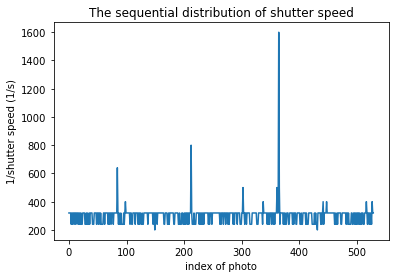

In [6]:
plt.plot(1/shutter)
plt.xlabel('index of photo')
plt.ylabel('1/shutter speed (1/s)')
plt.title('The sequential distribution of shutter speed')

Text(0.5, 1.0, 'hitogram of shutter speed')

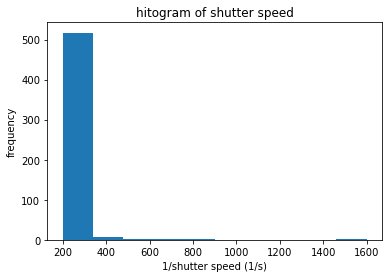

In [7]:
plt.hist(np.reshape(1/shutter, [-1, 1]))
plt.xlabel('1/shutter speed (1/s)')
plt.ylabel('frequency')
plt.title('hitogram of shutter speed')